# Neural networks  

 Neural networks are a type of machine learning model inspired by the human brain's structure and functioning. They are used for solving complex problems by learning patterns and relationships from data.

Similar to the human brain that has neurons interconnected to one another, artificial neural networks also have neurons that are interconnected to one another in various layers of the networks.

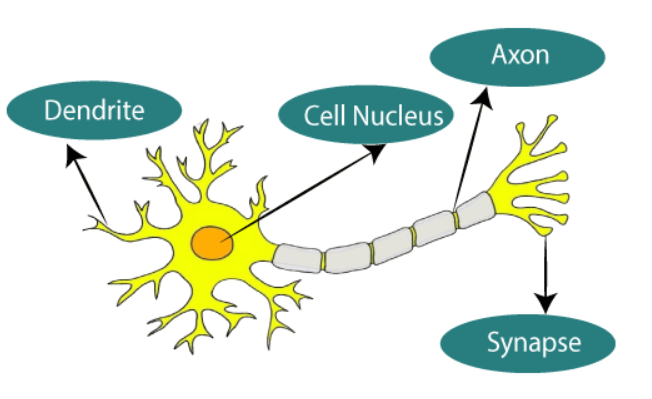

Biological Neuron 

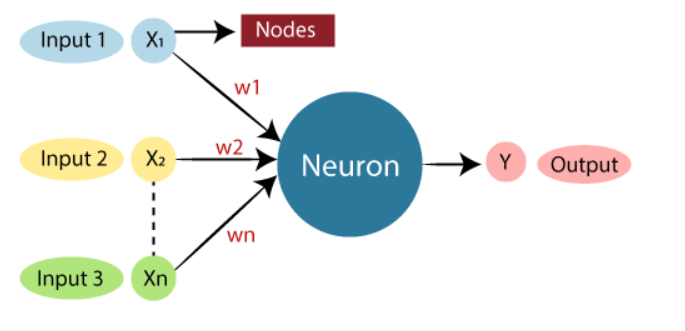

Artificial Neuron

Here, we will see a simple implementation of a neural network to classify points into their classes. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from mlxtend.plotting import plot_decision_regions

## Creating a neural network to classify a simple dataset.

The goal is to train a neural network to correctly classify the points into their respective classes.

In [2]:
# Create a neural network to classiy a linear dataset
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


### Generating the dataset.

In [3]:
# Randomly generate the data
np.random.seed(42)
num_samples_per_class = 100
mean_class_1 = [-1, -1]
mean_class_2 = [1, 1]
covariance = [[1, 0], [0, 1]]
X1 = np.random.multivariate_normal(mean_class_1, covariance, num_samples_per_class)
X2 = np.random.multivariate_normal(mean_class_2, covariance, num_samples_per_class)

# Create labels for the classes
y1 = np.zeros(num_samples_per_class)
y2 = np.ones(num_samples_per_class)

# Concatenate the data and labels
X = np.concatenate((X1, X2), axis=0)
y = np.concatenate((y1, y2), axis=0)


### Plotting the points

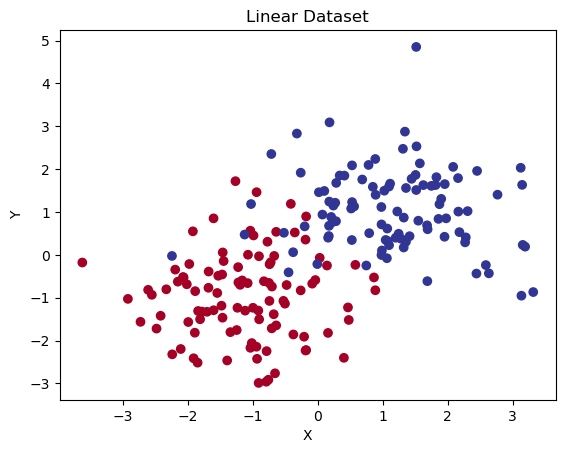

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Dataset')
plt.show()


### Creating the neural network 

In [8]:
# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(2,))
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


### Training the neural network 

In [6]:
# Train the model
history = model.fit(X, y, epochs=100, batch_size=16, verbose=1)


Epoch 1/100
13/13 [==============================] - 1s 3ms/step - loss: 0.7720 - accuracy: 0.1400
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7573 - accuracy: 0.1800
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7429 - accuracy: 0.2550
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7290 - accuracy: 0.3200
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7153 - accuracy: 0.4000
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7021 - accuracy: 0.4500
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5400
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6768 - accuracy: 0.6100
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6644 - accuracy: 0.6800
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6524 - accuracy: 0.7350
Epoch 11/

### Plotting the dataset with decision boundary 

279/279 [==============================] - 1s 2ms/step


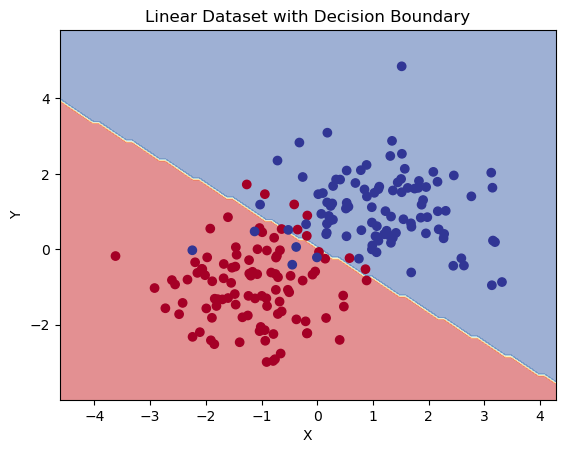

In [7]:
# Generate a grid of points to evaluate the model on
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Make predictions on the grid points
predictions = model.predict(grid_points)
predictions = (predictions > 0.5).astype(int)

# Plot the decision boundary
plt.contourf(xx, yy, predictions.reshape(xx.shape), alpha=0.5, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Dataset with Decision Boundary')
plt.show()


## Creating a neural network for a non-linear dataset

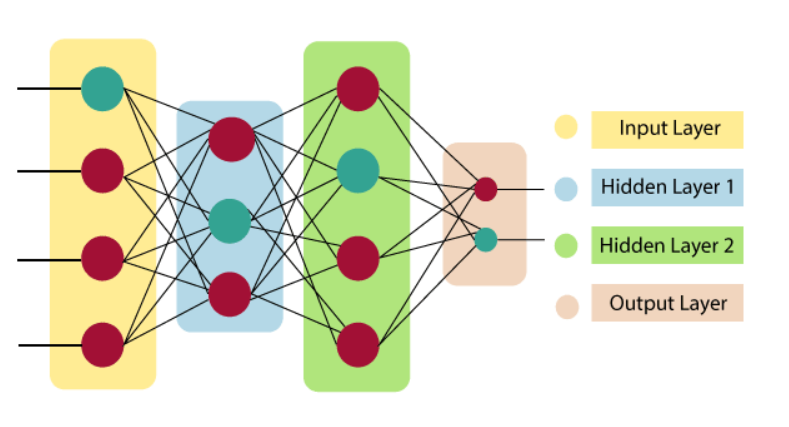

We can use multiple neurons and in layers to predict even non-linear classes. 
At a more advanced level, these can also be used to do things like recognizing images, creating text models like chatGPT etc. 

<AxesSubplot:>

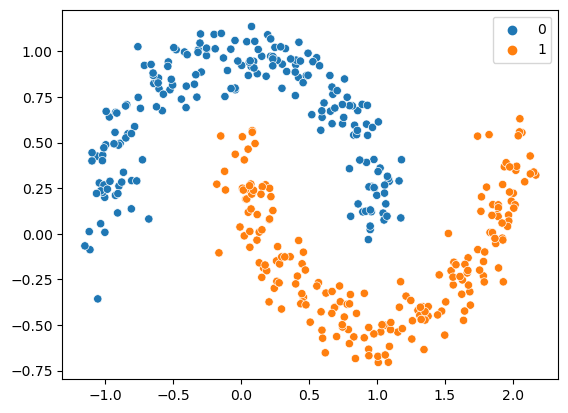

In [17]:
# Generate the make moons dataset
X, y = make_moons(n_samples=400, noise=0.1, random_state=42)

sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)



In [18]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
import keras
import tensorflow as tf
from tensorflow.keras.layers import Dropout
# Create a sequential model
model = Sequential()

# Add dense layers to the model
model.add(Dense(32, activation='relu', input_shape=(2,)))
model.add(keras.layers.BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
# Add batch normalization to the model 
model.add(keras.layers.BatchNormalization())
model.add(Dropout(0.3))


model.add(Dense(8,activation='relu'))
model.add(Dropout(0.3))
model.add(keras.layers.BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                96        
                                                                 
 batch_normalization_9 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 batch_normalization_10 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 dropout_10 (Dropout)        (None, 16)               

In [19]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)



Epoch 1/50
10/10 [==============================] - 2s 25ms/step - loss: 0.8902 - accuracy: 0.4219 - val_loss: 0.7137 - val_accuracy: 0.4000
Epoch 2/50
10/10 [==============================] - 0s 6ms/step - loss: 0.7737 - accuracy: 0.5562 - val_loss: 0.6982 - val_accuracy: 0.4125
Epoch 3/50
10/10 [==============================] - 0s 6ms/step - loss: 0.6891 - accuracy: 0.6313 - val_loss: 0.6801 - val_accuracy: 0.5500
Epoch 4/50
10/10 [==============================] - 0s 7ms/step - loss: 0.6165 - accuracy: 0.6750 - val_loss: 0.6606 - val_accuracy: 0.6750
Epoch 5/50
10/10 [==============================] - 0s 6ms/step - loss: 0.5809 - accuracy: 0.6875 - val_loss: 0.6433 - val_accuracy: 0.6875
Epoch 6/50
10/10 [==============================] - 0s 8ms/step - loss: 0.5691 - accuracy: 0.6750 - val_loss: 0.6284 - val_accuracy: 0.7375
Epoch 7/50
10/10 [==============================] - 0s 6ms/step - loss: 0.4981 - accuracy: 0.7688 - val_loss: 0.6129 - val_accuracy: 0.7250
Epoch 8/50
10/10 [=

Text(0, 0.5, 'Loss')

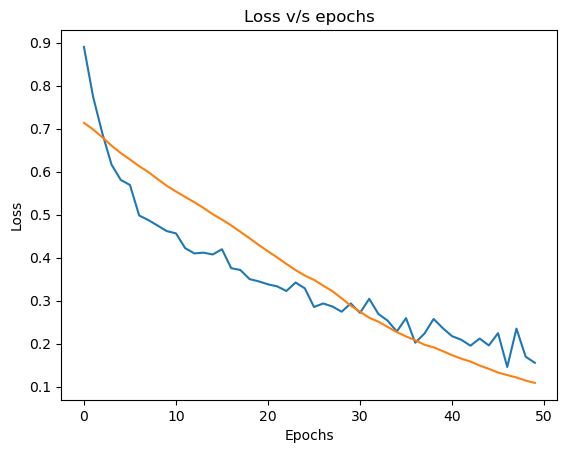

In [20]:
#plot the loss and accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss v/s epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

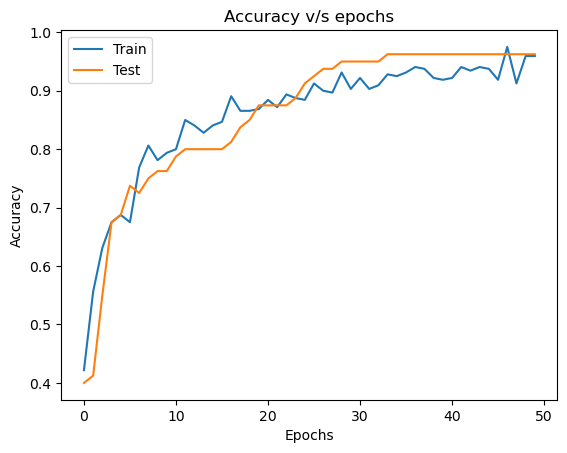

In [21]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy v/s epochs')
plt.xlabel('Epochs')
plt.legend(['Train','Test'])
plt.ylabel('Accuracy')

9600/9600 [==============================] - 13s 1ms/step


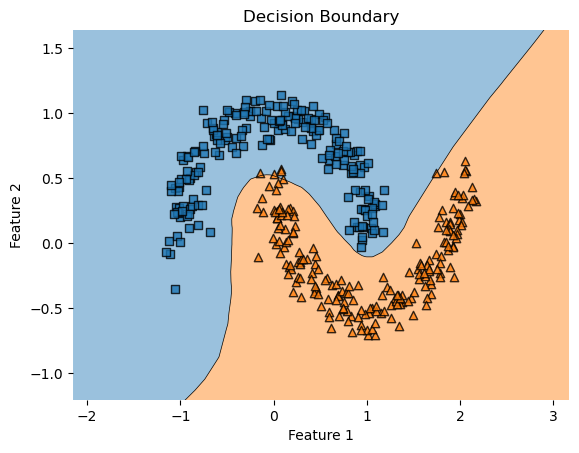

In [22]:
# Plot the decision boundary using mlxtend
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X=X, y=y, clf=model, legend=False)

plt.ylim([X[:, 1].min() - 0.5, X[:, 1].max() + 0.5])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary")
plt.show()